# Prøve-eksamen i Fys1120 H2022 - oppgave 1

Dette oppgavesettet tilsvarer en av to oppgaver som dere vil få til eksamen. (Denne oppgaven er stor, så den andre oppgaven vil være mindre). Hver oppgave på eksamen vil bestå av en Jupyter-notebook som dette. Dere arbeider med oppgaven i notebook'en og leverer notebook'en som en pdf file ved å lagre notebook'en og så laste den opp i inspera.

Dere vil kunne får både teori-oppgaver, programmerings-oppgaver og diskusjons-oppgaver som del av eksamen. Alle svarene skal dere skrive i den samme notebook'en.

## Elektrisk potensial og felt rundt en ringladning
Vi skal i denne oppgaven studere det elektriske potensialet rundt en ringformet ladning med radius $a$ som ligger i $xy$-planet. Ringen har en total ladning $q$ som er uniformt fordelt på ringen.

### Oppgave (a) 
Vis at det elektriske potensialet $V(z)$ langs $z$-aksen er gitt som
$$V(z) = \frac{q}{4 \pi \epsilon_0 (a^2 + z^2)^{1/2}}$$
(Du kan ikke levere en figur, så du må forklare hva du gjør med ord og matematiske uttrykk.)

(*Svar ved å trykke i denne cellen og skriv svaret her*)

(__Tips__ Du kan trykke på oppgave-cellene også og kopiere LaTeX koden derfra hvis du trenger den)

### Eksempel
Som en hjelp til å løse oppgaven, kan du ta utgangspunkt i dette eksempelet.

Det elektriske potensialet fra en dipol langs $z$-aksen kan beregnes og visualiseres ved hjelp av følgende program.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
def epotlist(r,Q,R):
    epsilon0 = 8.854e-12
    K = 1.0/(4.0*np.pi*epsilon0)
    V = 0
    for i in range(len(R)):
        Ri = r - R[i]
        qi = Q[i]
        Rinorm = np.linalg.norm(Ri)
        V = V + qi/Rinorm
    V = V*K
    return V
def findpot(R,Q,x0,x1,z0,z1,Nx,Nz): 
    x = np.linspace(x0,x1,Nx)
    z = np.linspace(z0,z1,Nz)
    rx,rz = np.meshgrid(x,z)
    V = np.zeros((Nx,Nz),float)
    for i in range(len(rx.flat)):
        r = np.array([rx.flat[i],rz.flat[i], 0])
        V.flat[i] = epotlist(r,Q,R) 
    return x,z,rx,rz,V

In [61]:
Q = []
R = []
a = 1.0
q = 1.0
R.append(np.array([0,0,-a/2]))
Q.append(-q)
R.append(np.array([0,0,a/2]))
Q.append(q)
x,z,rx,rz,V = findpot(R,Q,-1*a,1*a,-1*a,1*a,30,30)

(-1.1, 1.1, -1.1, 1.1)

c:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\quiver.py:658: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
c:\Users\nikol\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\quiver.py:658: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


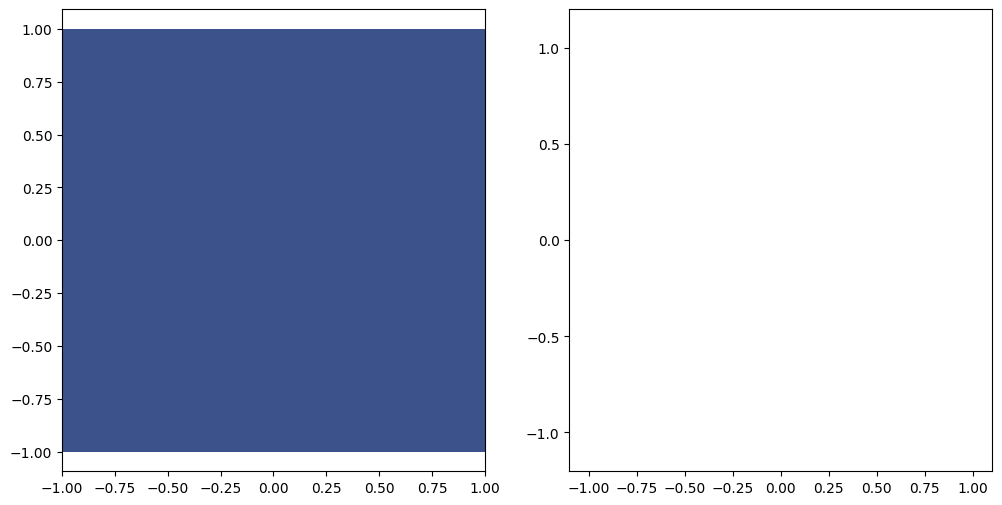

In [62]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.contourf(rx,rz,V)
plt.axis('equal')
plt.subplot(1,2,2)
Ez,Ex = np.gradient(-V)
plt.quiver(rx,rz,Ex,Ez)
plt.axis('equal')

## Sirkelladning
Vi skal nå se på en ladning formet som en sirkel med radius $a = 1 \text{cm}$ i $xy$-planet. Hele sirkelen har ladningen $q = 1 \text{mC}$.

### Oppgave (b)

Skriv et program som finner det elektriske potensialet i $xy$-planet og i $xz$-planet og visualiser potensialet og feltet i et område som illustrerer oppførselen godt.

(-0.02, 0.02, -0.02, 0.02)

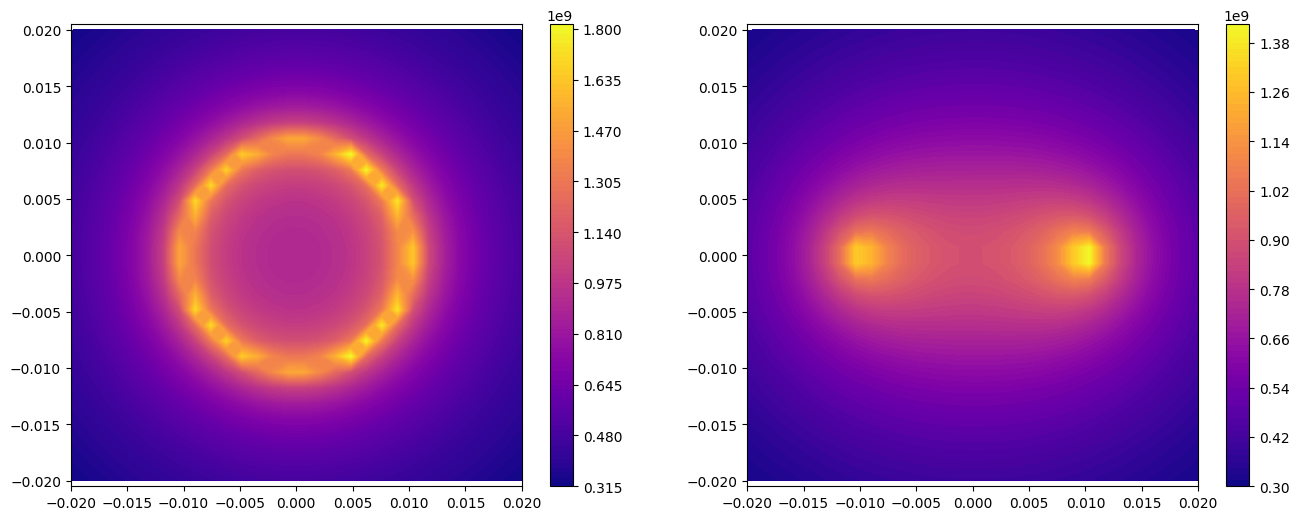

In [63]:
n = 100
a = 1e-2
q = 1e-3
R1 = []
R2 = []
Q = []
ring = np.linspace(0, 2 * np.pi, n)
for i in range(n):
    Q.append(q / n)
    R1.append(np.array([a * np.cos(ring[i]), a * np.sin(ring[i]), 0]))
    R2.append(np.array([a * np.cos(ring[i]) ,0, a * np.sin(ring[i])]))

    

x1,z1,rx1,rz1,V1 = findpot(R1,Q,-2*a,2*a,-2*a,2*a,30,30)
x2,z2,rx2,rz2,V2 = findpot(R2,Q,-2*a,2*a,-2*a,2*a,30,30)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.contourf(rx1,rz1,V1, cmap="plasma", levels = 100)
plt.colorbar()
plt.axis('equal')
plt.subplot(1,2,2)
Ez,Ex = np.gradient(-V)
plt.contourf(rx2,rz2,V2, cmap="plasma", levels = 100)
plt.colorbar()
plt.axis('equal')

## Sammenlikning med teori nær $z$-aksen

### Oppgave (c)
Vi ønsker å sammenlikne det eksakte resutatet vi fant langs $z$-aksen med resultatet fra programmet ditt nær $z$-aksen for å se hvor stor feil vi får hvis vi bruker det eksakte resultet i et område hvor det ikke er gyldig. Lag et plot av $V(a/2,0,z)$ og sammenlikn med det eksakte resultatet i $(0,0,z)$ for $z = -2a$ til $z=2a$. Kommenter kort resultatet.

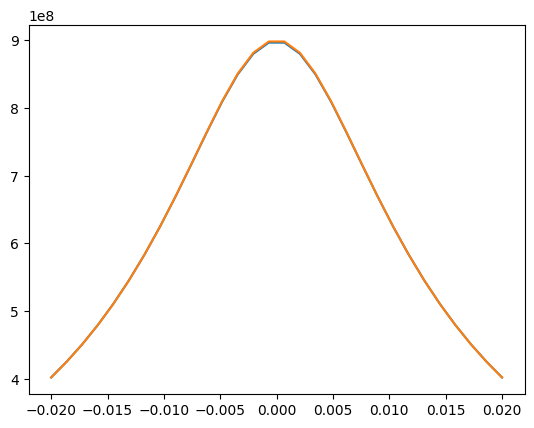

In [67]:
# (Svar)
z = np.linspace(-2*a, 2*a, 30)
epsilon0 = 8.854e-12
K = q/(4.0*np.pi*epsilon0)
v = K / np.sqrt(a**2 + z**2)
plt.plot(z, v)
plt.plot(z, V2[:, int(30/2)])

## Sammenlikning med teori langt vekk fra linjestykket i $xy$-planet

### Oppgave (d)
Hva forventer du at det elektriske potensialet $V(x,y,0)$ vil være når $r = (x^2+ y^2)^{1/2} r\gg a$? Du skal komme fram til et enkelt uttrykk for $V(r)$ og gi en kort forklaring for hvorfor dette uttrykket er en god tilnærming i den oppgitte grensen. 

(*Svar*)

### Oppgave (e)
Sammenlikn resultatet fra programmet ditt med $V(r)$ for eksempel ved å plotte $V(r)$ for $r = a+a/10$ til $r= 10a$.

In [79]:
# Svar
r = np.linspace(a + a/10, 10*a, n)

Vr = []
for i in range(n):
    ri = np.array([r[i], 0, 0])
    Vr.append(epotlist(ri, Q, R1))
    

V = q / (K * r)
plt.plot(r, V)
plt.plot(r, Vr)

IndexError: list index out of range